In [3]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as py    
import pandas as pd

In [4]:
# Importing the dataset  
dataset = pd.read_csv('/content/drive/MyDrive/dataset/Mall_Customers.csv')

In [5]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
x1 = dataset.iloc[:, [3, 4]]

In [14]:
x1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [15]:
x = dataset.iloc[:, [3, 4]].values


In [16]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  

#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  

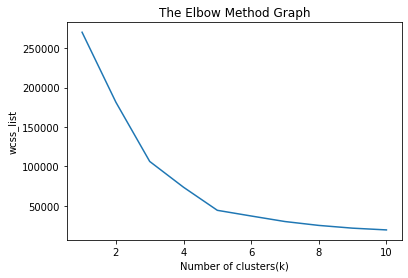

In [17]:
py.plot(range(1, 11), wcss_list)  
py.title('The Elbow Method Graph')  
py.xlabel('Number of clusters(k)')  
py.ylabel('wcss_list')  
py.show()

In [18]:

#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)
labels = kmeans.labels_

In [19]:
from sklearn import metrics
print(metrics.silhouette_score(x, labels, metric='euclidean'))

0.553931997444648


In [20]:
print(metrics.calinski_harabasz_score(x, labels))


247.35899338037282


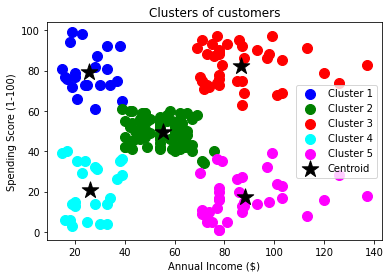

In [22]:
#visulaizing the clusters  
py.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
py.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  

py.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
py.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  

py.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
py.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroid',marker="*")   

py.title('Clusters of customers')  
py.xlabel('Annual Income ($)')  
py.ylabel('Spending Score (1-100)')  
py.legend()  
py.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [25]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Iris.csv')


In [26]:
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.shape


(150, 5)

In [28]:
df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
df.dtypes


SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [31]:
#to know all types of unique values
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [32]:
df['Species'].value_counts()


Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [33]:
# detect missing values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [35]:
iris = pd.DataFrame(df)
iris_df = iris.drop(columns=["Species"])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
from sklearn.cluster import KMeans

#Calculating the Within-Cluster-Sum-of-Squares
WCSS = []
clusters_range = range(1,11)
for i in clusters_range:
 km = KMeans(n_clusters=i, init="k-means++", random_state=0)
 km = km.fit(iris_df)
 WCSS.append(km.inertia_)

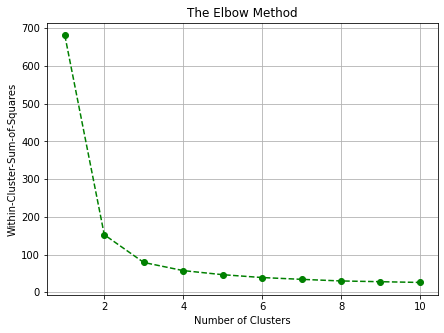

In [37]:
#Plotting the "Within-Cluster-Sum-of-Squares" against clusters range
plt.figure(figsize=(7,5))
plt.plot(clusters_range,WCSS,'go--',color='green')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.grid()
plt.show()

In [38]:
# Applying kmeans to the dataset / Creating the kmeans classifier
km = KMeans(n_clusters=3, init='k-means++', random_state=0)
y = km.fit_predict(iris_df)         #predicting the model
y              #represents the label of clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [39]:

# returns centroid of the cluster formed
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

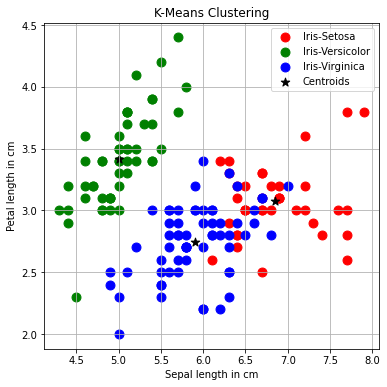

In [43]:

# Visualising the clusters - On the first two columns
plt.figure(figsize=(6,6))
x=iris_df.iloc[:,[0,1,2,3]].values
plt.scatter(x[y==0,0], x[y==0,1], s=80, c='red', label='Iris-Setosa')
plt.scatter(x[y==1,0], x[y==1,1], s=80, c='green', label='Iris-Versicolor')
plt.scatter(x[y==2,0], x[y==2,1], s=80, c='blue', label='Iris-Virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s=80, c='black', label='Centroids',marker='*')
plt.xlabel('Sepal length in cm')
plt.ylabel('Petal length in cm')
plt.title('K-Means Clustering')
plt.legend()
plt.grid()
plt.show()


In [44]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [45]:
X,y = make_blobs(n_samples = 500,centers=5,random_state=3)


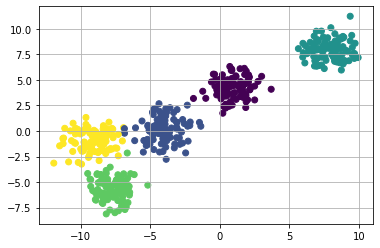

In [46]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1],c=y)

In [47]:
k = 5
color=["green","red","blue","yellow","orange"]
clusters = {}
for i in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        "center":center,
        "points":points,
        'colors' : color[i]
    }
    clusters[i] = cluster

In [48]:
clusters


{0: {'center': array([-3.52990269, -2.45104577]),
  'colors': 'green',
  'points': []},
 1: {'center': array([-3.03946888, -6.03106966]),
  'colors': 'red',
  'points': []},
 2: {'center': array([8.67472098, 6.6224794 ]),
  'colors': 'blue',
  'points': []},
 3: {'center': array([2.67144605, 3.56689694]),
  'colors': 'yellow',
  'points': []},
 4: {'center': array([3.7721856 , 7.96283885]),
  'colors': 'orange',
  'points': []}}

In [49]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [50]:
def assignPointsToClusters(clusters):
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]
        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)
def updateClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []
def plotClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        print(pts.shape)
        try:
            plt.scatter(pts[:,0],pts[:,1])
        except:
            pass
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")

(221, 2)
(78, 2)
(92, 2)
(100, 2)
(9, 2)


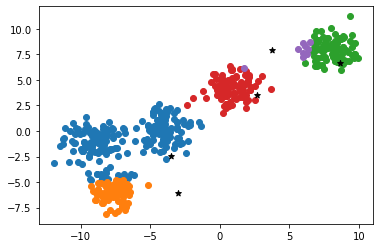

In [51]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(191, 2)
(103, 2)
(84, 2)
(106, 2)
(16, 2)


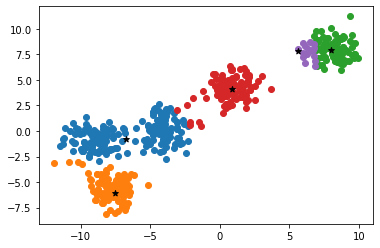

In [52]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

(189, 2)
(105, 2)
(66, 2)
(106, 2)
(34, 2)


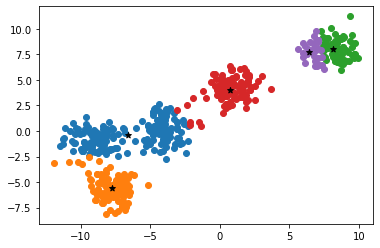

In [53]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

In [54]:
from sklearn.cluster import KMeans


In [59]:
obj=KMeans(n_clusters=5)
obj.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [60]:
labels=obj.labels_
centers=obj.cluster_centers_

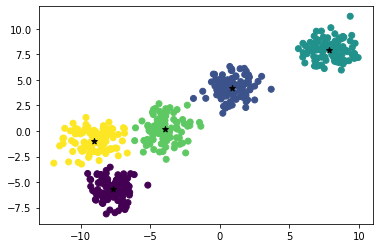

In [61]:
plt.scatter(X[:,0],X[:,1],c=labels)
for x in range(k):
  plt.scatter(centers[x][0],centers[x][1],color="black",marker="*")